Write a Python unit test program to check if a function correctly parses and validates input data.

In [2]:
import unittest
import re

In [16]:
def validate_input(data):
    pat = r'^[a-zA-Z]{4,6}[!@#$%]\d{4}'
    if re.search(pat, data):
        return True
    return False 

class Test(unittest.TestCase):
    def test_one(self):
        data = "Jeet#1234"
        result = validate_input(data)
        self.assertEqual(result, True)
        
    def test_two(self):
        data = "Je#12"
        result = validate_input(data)
        self.assertEqual(result, False)

# if __name__ == "__main__":
#     unittest.main() 

If Both the test cases pases.
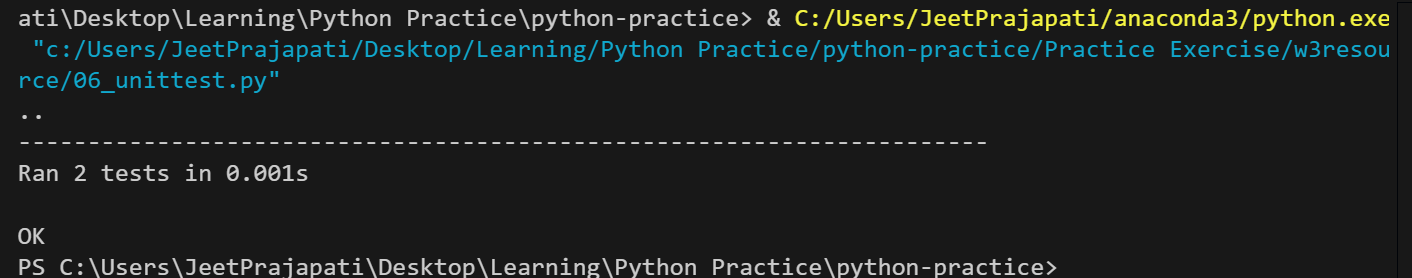

In test_two: if "self.assertEqual(result, True)", Testcase Fails

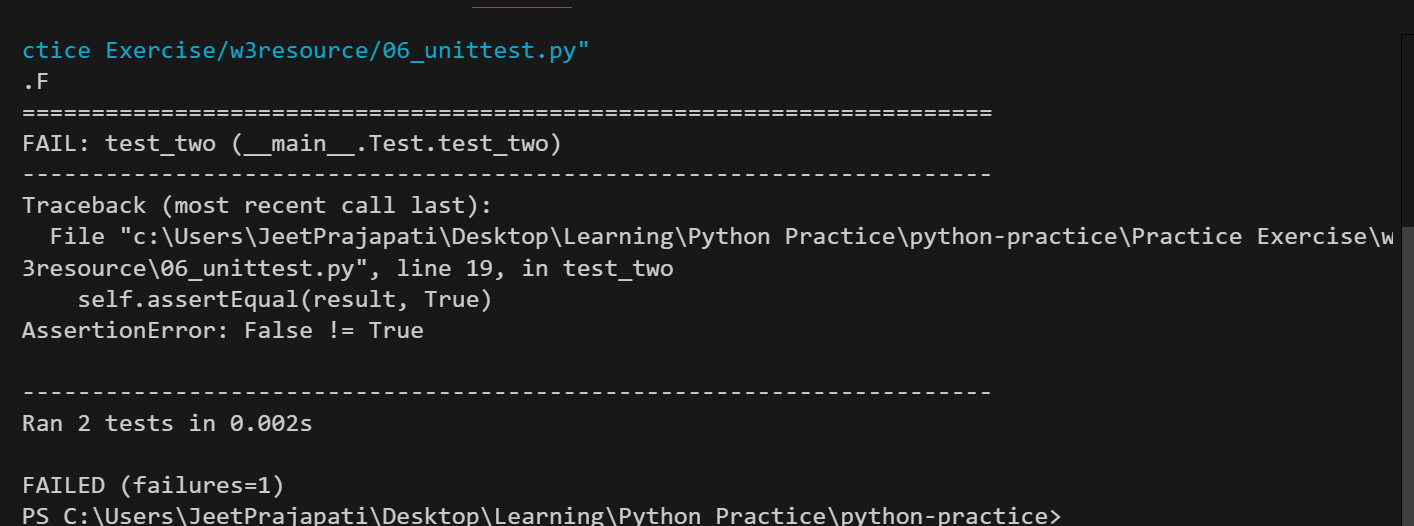

Write a Python program that executes a list operation and handles an AttributeError exception if the attribute does not exist.

In [12]:
List = [ 1, 2, 3, 4, 5 ]

try:
    sum = sum(List)
except AttributeError:
    print("AttributeError Exception!!")
except:
    print("Exception Occured")
else:
    print(sum)
finally:
    print("Execution completed!!")

15
Execution completed!!


In [13]:
List = [ 1, 2, 3, 4, 5, 'X' ]

try:
    sum = sum(List)
except AttributeError:
    print("AttributeError Exception!!")
except:
    print("Exception Occured")
else:
    print(sum)
finally:
    print("Execution completed!!")

Exception Occured
Execution completed!!


In [15]:
List = [ 1, 2, 3, 4, 5 ]

try:
    sum = List.add(1)
except AttributeError:
    print("AttributeError Exception!!")
except:
    print("Exception Occured")
else:
    print(sum)
finally:
    print("Execution completed!!")

AttributeError Exception!!
Execution completed!!


Write a Python program to create a class representing a bank. Include methods for managing customer accounts and transactions.

In [27]:
class Bank:
    def __init__(self):
        self.customers = {}

    def create_account(self, account_number, name, mobile, initial_balance=0):
        if account_number in self.customers:
            print("Account number already exists.")
        else:
            self.customers[account_number] = {"name": name, "mobile": mobile, "balance": initial_balance}
            print("Account created successfully.")

    def make_deposit(self, account_number, amount):
        if account_number in self.customers:
            self.customers[account_number]["balance"] += amount
            print("Deposit successful.")
        else:
            print("Account number does not exist.")

    def make_withdrawal(self, account_number, amount):
        if account_number in self.customers:
            if self.customers[account_number]["balance"] >= amount:
                self.customers[account_number]["balance"] -= amount
                print("Withdrawal successful.")
            else:
                print("Insufficient funds.")
        else:
            print("Account number does not exist.")

    def check_balance(self, account_number):
        if account_number in self.customers:
            balance = self.customers[account_number]["balance"]
            print(f"Account balance: {balance}")
        else:
            print("Account number does not exist.")
            
    def __str__(self):
        return str(self.customers)


In [30]:
bank = Bank()

acno1= "SB-123"
damt1 = 1000
print("New a/c No.: ",acno1,"Deposit Amount:",damt1)
bank.create_account(acno1, "Jeet", "1234567890", damt1)
 

New a/c No.:  SB-123 Deposit Amount: 1000
Account created successfully.


In [31]:
print(bank)

{'SB-123': {'name': 'Jeet', 'mobile': '1234567890', 'balance': 1000}}


In [32]:
acno2= "SB-124"
damt2 = 1500
print("New a/c No.: ",acno2,"Deposit Amount:",damt2)
bank.create_account(acno2, "Jay", "1234567890", damt2)


New a/c No.:  SB-124 Deposit Amount: 1500
Account created successfully.


In [35]:
print(bank)

{'SB-123': {'name': 'Jeet', 'mobile': '1234567890', 'balance': 1000}, 'SB-124': {'name': 'Jay', 'mobile': '1234567890', 'balance': 1500}}


In [36]:
wamt1 = 600
print("\nDeposit Rs.",wamt1,"to A/c No.",acno1)
bank.make_deposit(acno1, wamt1)

wamt2 = 350
print("Withdraw Rs.",wamt2,"From A/c No.",acno2)
bank.make_withdrawal(acno2, wamt2)


Deposit Rs. 600 to A/c No. SB-123
Deposit successful.
Withdraw Rs. 350 From A/c No. SB-124
Withdrawal successful.


In [37]:
print("A/c. No.",acno1)
bank.check_balance(acno1)

print("A/c. No.",acno2)
bank.check_balance(acno2)

wamt3 = 1200
print("Withdraw Rs.",wamt3,"From A/c No.",acno2)
bank.make_withdrawal(acno2, wamt3)

acno3 = "SB-134"
print("A/c. No.",acno3)
bank.check_balance(acno3) 

A/c. No. SB-123
Account balance: 1600
A/c. No. SB-124
Account balance: 1150
Withdraw Rs. 1200 From A/c No. SB-124
Insufficient funds.
A/c. No. SB-134
Account number does not exist.


In [38]:
print(bank)

{'SB-123': {'name': 'Jeet', 'mobile': '1234567890', 'balance': 1600}, 'SB-124': {'name': 'Jay', 'mobile': '1234567890', 'balance': 1150}}


Write a Python program that implements a decorator to provide caching with expiration time for a function.

In [39]:
import time

def cache_with_expiry(expiry_time):
    def decorator(func):
        cache = {}
        def wrapper(x, y):
            key = (x, y)
            if key in cache:
                value, timestamp = cache[key]
                if time.time() - timestamp < expiry_time:
                    print("Retrieving result from cache...")
                    return value
                    
            result = func(x, y)
            cache[key] = (result, time.time())
            return result
        return wrapper
    return decorator


@cache_with_expiry(expiry_time=5) 
def calculate_multiply(x, y):
    print("Calculating product of two numbers...")
    return x * y

print(calculate_multiply(10, 5))  
print(calculate_multiply(10, 5)) 
time.sleep(5)
print(calculate_multiply(10, 5)) 


Calculating product of two numbers...
50
Retrieving result from cache...
50
Calculating product of two numbers...
50
